# PLEASE READ: To run this notebook, you have to run this first cell, and may need to restart the runtime to use the new version. 
# Additionally, make sure you have a 24GB RAM session. You can force this running the while(1) cell, and answering YES when asked if you want to migrate to a more powerfull machine. 
# Lastly, this notebook depends on another, with the main functions used to make the plots and data cleaning. It is automatically run, it is just a warning, you must have it in the same folder as this notebook. 

%run '/content/drive/My Drive/CA683_Assignment/CarAccidentsFunctionsUK.ipynb'

### Force machine to have 25GB ram

In [0]:
# a = []
# while(1):
#   a.append('11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111')

In [0]:
!pip install imbalanced-learn --upgrade

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.6.2)


### Imports and reading the csv files

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# %matplotlib inline
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import * 


import time
start_time = time.time()

import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:20,.2f}'.format

runKMeansAndTestReg = False
runFirstRefression = False

def print(*args):
    __builtins__.print(*("%.2f" % a if isinstance(a, float) else a for a in args))

pd.set_option('display.max_columns', None)
None


### There is a version to run on colab and another version to run locally. Additionally, there is a cell when you can limit the years to run it quickly.

In [0]:
# # Colab version
from google.colab import drive
import os
drive.mount('/content/drive/')

os.chdir('/content/drive/My Drive/CA683_Assignment/data')
!ls

%run '/content/drive/My Drive/CA683_Assignment/CarAccidentsFunctionsUK.ipynb'

accidents = pd.read_csv('accidents.csv', encoding='cp1252',na_values=[-1])
vehicles = pd.read_csv('vehicles.csv', encoding='cp1252',na_values=[-1])

data = pd.merge(accidents,vehicles,on='Accident_Index',how='inner',sort=False).drop_duplicates()
del accidents
del vehicles
print("--- %s seconds ---" % (time.time() - start_time))


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
accidents.csv  engine_plot.png	vehicles.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


--- 96.54440832138062 seconds ---


In [0]:
# %run CarAccidentsFunctionsUK.ipynb

# accidents = pd.read_csv('D:\\MyWorkSpace\\ML_683_Assignment\\data\\categorical\\accidents.csv', encoding='cp1252',na_values=[-1])
# vehicles = pd.read_csv('D:\\MyWorkSpace\\ML_683_Assignment\\data\\categorical\\vehicles.csv', encoding='cp1252',na_values=[-1])

# data = pd.merge(accidents,vehicles,on='Accident_Index',how='inner',sort=False).drop_duplicates()
# del accidents
# del vehicles
# print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
# # temporary code
# data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
# data = data[data['datetime'].dt.year >= 2010]
# # temporary code

# 2. Data understanding \ Data quality

We are using a dataset provided by Kaggle (https://www.kaggle.com/benoit72/uk-accidents-10-years-history-with-many-variables).
It was used an external tool to create the categorical features for this dataset, so it is slightly different.

Here we present the data-set values, analyse its missing values and range.

In [0]:
#Analysing accidents data
#Date range
dates = pd.to_datetime(data['date'])
print(f'Range is from {min(dates.dt.date)} to {max(dates.dt.date)}')
del dates

print(f'Shape: {data.shape}')
display(data.head(3))
display(data.groupby('Accident_Severity').size())

Range is from 2005-01-01 to 2014-12-31
Shape: (3004425, 53)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,date,time,_1st_Road_Number,Speed_limit,_2nd_Road_Number,LSOA_of_Accident_Location,Police_Force,Accident_Severity,Local_Authority_District,_1st_Road_Class,Road_Type,Junction_Detail,Junction_Control,_2nd_Road_Class,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Light_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Day_of_Week,Local_Authority_Highway,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards,Special_Conditions_at_Site,Engine_Capacity_CC,Age_of_Vehicle,Age_of_Driver,Vehicle_Reference,Vehicle_Location_Restricted_Lane,Age_Band_of_Driver,Vehicle_Leaving_Carriageway,Vehicle_Type,Vehicle_Manoeuvre,Hit_Object_off_Carriageway,Hit_Object_in_Carriageway,Journey_Purpose_of_Driver,Sex_of_Driver,Propulsion_Code,Driver_IMD_Decile,Driver_Home_Area_Type,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive,Skidding_and_Overturning,Junction_Location,Towing_and_Articulation
0,201001HT20647,"535,850.00","181,170.00",-0.04,51.51,2,2,2010-09-08,17:55:00.0000000,13.00,30,0.00,E01004299,Metropolitan Police,Slight,Tower Hamlets,A,Single carriageway,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Urban,Yes,Wednesday,Tower Hamlets,Raining no high winds,Wet or damp,None,None,955.00,7.00,45.00,1,On main c'way - not in restricted lane,36 - 45,Did not leave carriageway,Motorcycle over 500cc,Overtaking moving vehicle - offside,None,None,Other/Not known (2005-10),Male,Petrol,NaN,NaN,Nearside,No,None,Mid Junction - on roundabout or on main road,No tow/articulation
1,201001HT20647,"535,850.00","181,170.00",-0.04,51.51,2,2,2010-09-08,17:55:00.0000000,13.00,30,0.00,E01004299,Metropolitan Police,Slight,Tower Hamlets,A,Single carriageway,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Urban,Yes,Wednesday,Tower Hamlets,Raining no high winds,Wet or damp,None,None,"1,910.00",3.00,22.00,2,On main c'way - not in restricted lane,21 - 25,Did not leave carriageway,Car,Turning right,None,None,Other/Not known (2005-10),Male,Heavy oil,NaN,NaN,Offside,No,None,Mid Junction - on roundabout or on main road,No tow/articulation
2,201001HT20648,"538,850.00","181,180.00",-0.00,51.51,3,1,2010-09-11,17:29:00.0000000,13.00,30,"1,268.00",E01004220,Metropolitan Police,Slight,Tower Hamlets,A,Single carriageway,T or staggered junction,Auto traffic signal,A,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Urban,Yes,Saturday,Tower Hamlets,Fine no high winds,Dry,None,None,"1,149.00",3.00,19.00,1,On main c'way - not in restricted lane,16 - 20,Did not leave carriageway,Car,Going ahead left-hand bend,None,None,Other/Not known (2005-10),Female,Petrol,NaN,NaN,Back,No,None,Approaching junction or waiting/parked at junc...,No tow/articulation


Accident_Severity
Fatal        38083
Serious     373281
Slight     2593061
dtype: int64

In [0]:
print('Missing data for accidents:')
display(getMissingValuesStats(data))

print('Describe for accidents:')
display(data.describe())

Missing data for accidents:


,_2nd_Road_Class,Junction_Control,Age_of_Vehicle,Driver_IMD_Decile,Engine_Capacity_CC,Propulsion_Code,Driver_Home_Area_Type,Age_Band_of_Driver,Age_of_Driver,LSOA_of_Accident_Location,Journey_Purpose_of_Driver,_2nd_Road_Number,Was_Vehicle_Left_Hand_Drive,Junction_Location,Road_Surface_Conditions,Vehicle_Manoeuvre,1st_Point_of_Impact,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Type,Weather_Conditions,time,Longitude,Location_Easting_OSGR,Latitude,Location_Northing_OSGR,Towing_and_Articulation,Skidding_and_Overturning,Vehicle_Leaving_Carriageway,Hit_Object_in_Carriageway,Vehicle_Location_Restricted_Lane,Pedestrian_Crossing_Physical_Facilities,Hit_Object_off_Carriageway,Carriageway_Hazards,Pedestrian_Crossing_Human_Control,Junction_Detail,Sex_of_Driver,Special_Conditions_at_Site,_1st_Road_Number
Total_Missing,"1,194,664.00","1,027,155.00","874,989.00","849,921.00","788,471.00","770,004.00","588,611.00","330,608.00","330,608.00","204,798.00","44,921.00","31,834.00","23,049.00","9,876.00","3,806.00","1,080.00",565.00,498.00,473.00,297.00,222.00,200.00,198.00,198.00,198.00,184.00,132.00,127.00,87.00,74.00,65.00,54.00,53.00,37.00,33.00,33.00,30.00,2.00
Percent_Missing,39.76,34.19,29.12,28.29,26.24,25.63,19.59,11.00,11.00,6.82,1.50,1.06,0.77,0.33,0.13,0.04,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Describe for accidents:


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,_1st_Road_Number,Speed_limit,_2nd_Road_Number,Engine_Capacity_CC,Age_of_Vehicle,Age_of_Driver,Vehicle_Reference
count,"3,004,227.00","3,004,227.00","3,004,225.00","3,004,227.00","3,004,425.00","3,004,425.00","3,004,423.00","3,004,425.00","2,972,591.00","2,215,954.00","2,129,436.00","2,673,817.00","3,004,425.00"
mean,"440,306.77","296,553.53",-1.43,52.56,2.11,1.43,"1,003.42",39.56,396.38,"1,914.37",7.24,38.70,1.56
std,"94,822.76","158,381.77",1.39,1.43,0.94,1.00,"1,812.27",14.44,"1,326.98","1,708.69",4.50,15.85,0.76
min,"64,950.00","10,290.00",-7.52,49.91,1.00,1.00,0.00,10.00,0.00,1.00,1.00,1.00,1.00
25%,"377,270.00","177,936.00",-2.34,51.49,2.00,1.00,0.00,30.00,0.00,"1,299.00",4.00,26.00,1.00
50%,"441,070.00","264,600.00",-1.39,52.27,2.00,1.00,130.00,30.00,0.00,"1,598.00",7.00,37.00,1.00
75%,"522,570.00","395,223.00",-0.23,53.45,2.00,2.00,706.00,50.00,0.00,"1,995.00",10.00,49.00,2.00
max,"655,540.00","1,208,800.00",1.76,60.76,67.00,93.00,"9,999.00",70.00,"9,999.00","99,999.00",111.00,100.00,91.00


# 3. Data Cleaning and data preparation

This is the "final code" of data cleaning and preparation. Many changes on data were made, please read the document provided.

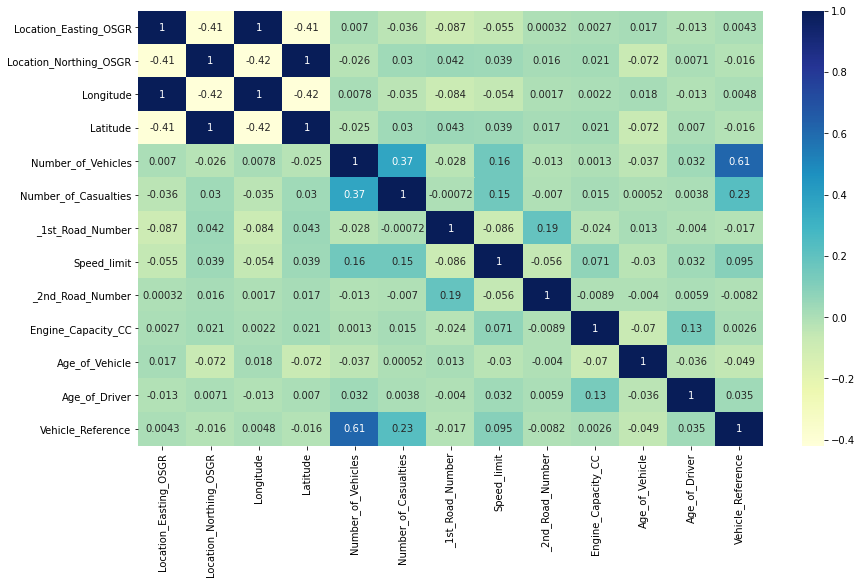

In [0]:
#correlation matrix
fig, ax1 = plt.subplots(1,1,figsize=(14, 8))

corr = data.corr()
sns.heatmap(corr, annot=True,cmap='YlGnBu', ax=ax1)
plt.show()

In [0]:
data['Accident_Severity_Value'] = data['Accident_Severity']
data['Propulsion_Code'] = data['Propulsion_Code'].apply(normalizePropulsionCode)
engineCapacityNormalizer(data)

data = ageDriverNormalizer(data)
ageVehicleNormalizer(data)

data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data['day_of_week_number'] = data['datetime'].dt.dayofweek
data['day_of_week'] = data['day_of_week_number'].astype('str') + ' ' + data['datetime'].dt.strftime('%A') #little trick, but if we do not set the day number the plot will be
data['hour'] = data['datetime'].dt.hour
data['weekends'] = data['day_of_week_number'].apply(lambda x: 'Weekend' if (x >= 5) else 'Week')
data['weekendNight'] = data['datetime'].apply(isWeekendNight)
hourOfDayNormalizer(data)

print("--- %s seconds ---" % (time.time() - start_time))

--- 159.14754700660706 seconds ---


This section run the K means to find the best split for out data. Note that there is an flag, saying if this cell will be run or not. This is because it is very time consuming.

In [0]:
if (runKMeansAndTestReg == True):
    data['Accident_Severity_Value'] = data['Accident_Severity'].apply(accidentSeverityTransformation)
    TestLogisticRegForPropulsionCode(data)

    #Using KMeans to find best split of hours of day into bins
    # validData = data[data['Engine_Capacity_CC'] > 0]
    # clusterBySeverityUsingKMeans(validData,'Engine_Capacity_CC',nClustersFinal=8,nClustersElbow = 10)

    #Using KMeans to find best split of hours of day into bins
    validData = data[data['hour'] >= 0]
    clusterBySeverityUsingKMeans(validData,'hour',nClustersFinal=5,nClustersElbow = 8)

    #Using KMeans to find best split of hours of day into bins
    validData = data[data['Age_of_Vehicle'] >= 1]
    clusterBySeverityUsingKMeans(validData,'Age_of_Vehicle',nClustersFinal=5,nClustersElbow = 8)

    #Using KMeans to find best split of hours of day into bins
    validData = data[data['Age_of_Driver'] >= 1]
    clusterBySeverityUsingKMeans(validData,'Age_of_Driver',nClustersFinal=4,nClustersElbow = 8)

#### Features related to age of driver and vehicle are importants. There are Unknown values, * must be removed *. Sex of driver Not Known too

# EDA: This section make the plots to compare the features against the severity. The plots are on log scale.

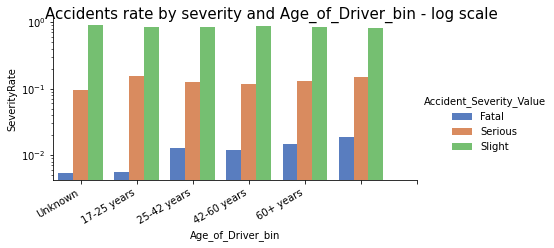

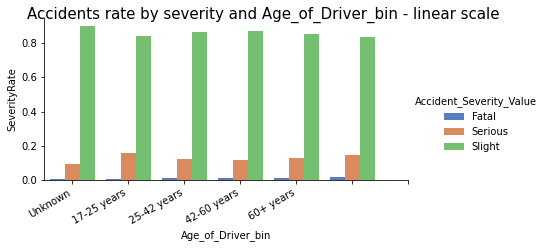

WARN: Journey_Purpose_of_Driver has 44921 NaN values. Percentage: 1.5


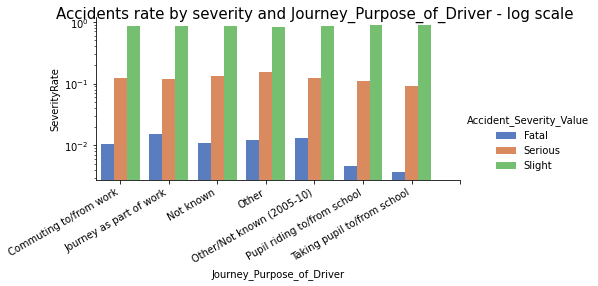

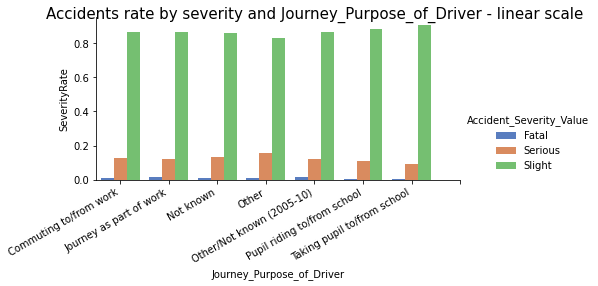

WARN: Sex_of_Driver has 33 NaN values. Percentage: 0.0


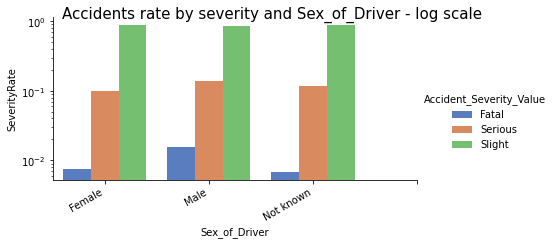

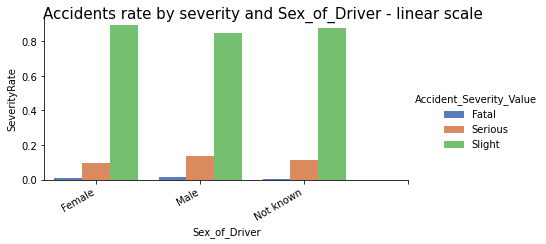

In [0]:
plotSeverityRateByIndependentVariable(data,'Age_of_Driver_bin','Age_of_Driver_desc',yscale='log')
plotSeverityRateByIndependentVariable(data,'Journey_Purpose_of_Driver',yscale='log')
plotSeverityRateByIndependentVariable(data,'Sex_of_Driver',yscale='log')

Variables related to datetime. They are all relevant and no furtur cleaning is needed. 

Maybe weekendNight and weekend are redundant. Let's do a chi test
Maybe different days of week are the same, lets do a chi test

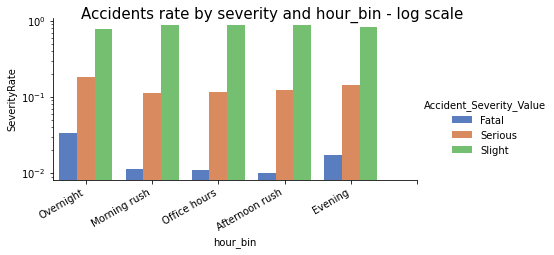

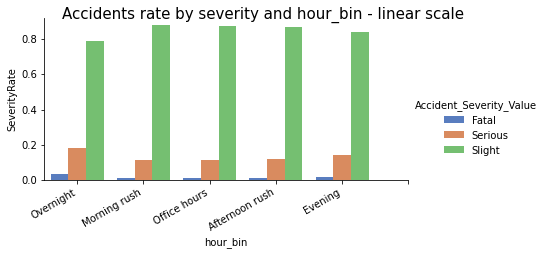

WARN: day_of_week has 222 NaN values. Percentage: 0.0


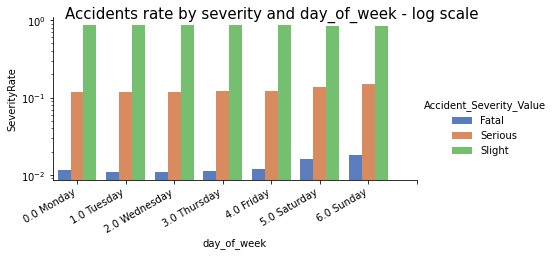

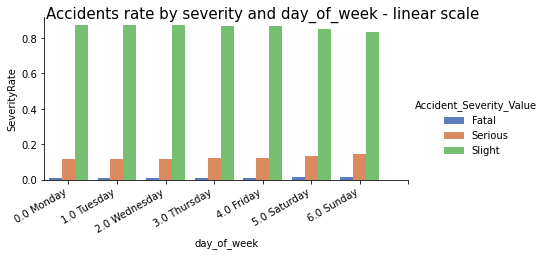

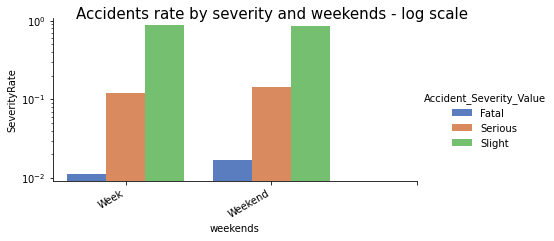

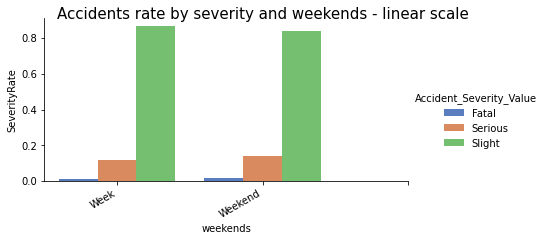

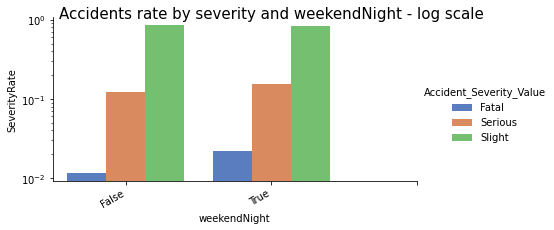

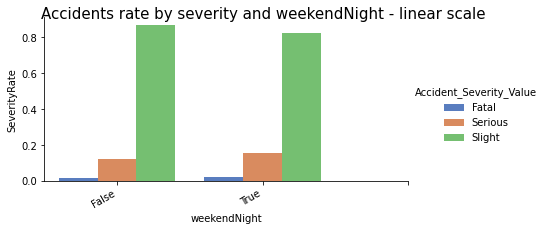

In [0]:
plotSeverityRateByIndependentVariable(data,'hour_bin','hour_bin_desc',yscale='log')
plotSeverityRateByIndependentVariable(data,'day_of_week',yscale='log')
plotSeverityRateByIndependentVariable(data,'weekends',yscale='log')
plotSeverityRateByIndependentVariable(data,'weekendNight',yscale='log')
None

Features related to manoeuvre

WARN: Vehicle_Location_Restricted_Lane has 74 NaN values. Percentage: 0.0


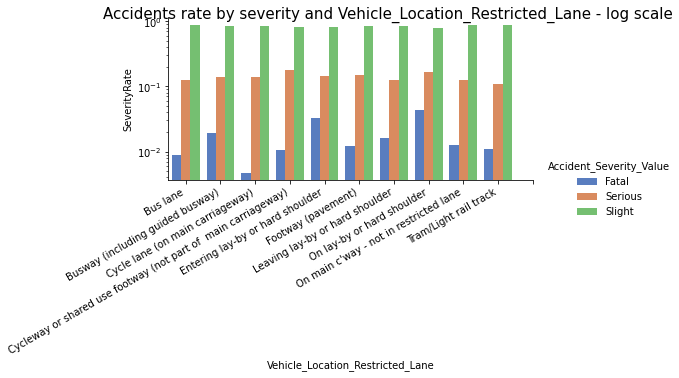

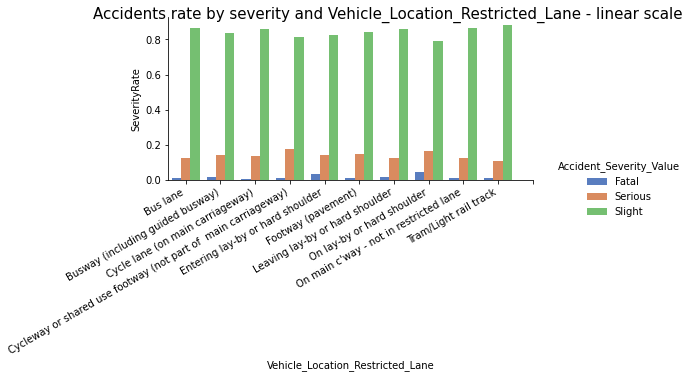

WARN: Vehicle_Leaving_Carriageway has 127 NaN values. Percentage: 0.0


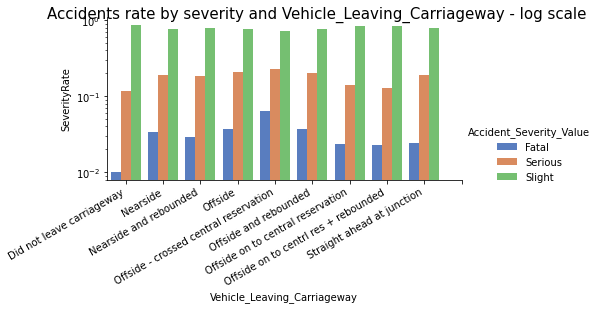

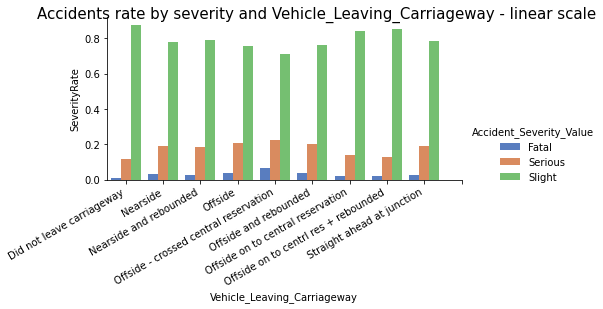

WARN: Vehicle_Manoeuvre has 1080 NaN values. Percentage: 0.0


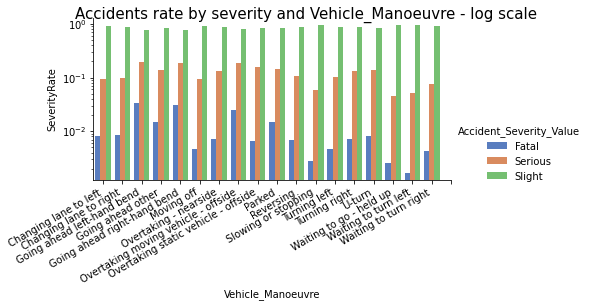

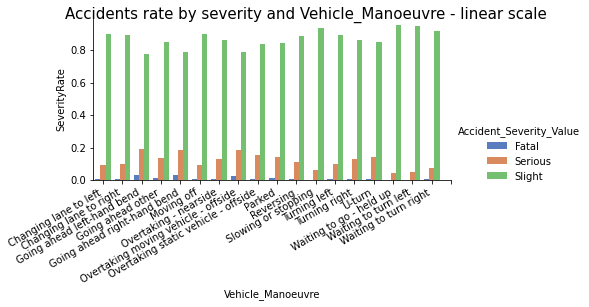

In [0]:
plotSeverityRateByIndependentVariable(data,'Vehicle_Location_Restricted_Lane',yscale='log')
plotSeverityRateByIndependentVariable(data,'Vehicle_Leaving_Carriageway',yscale='log')
plotSeverityRateByIndependentVariable(data,'Vehicle_Manoeuvre',yscale='log')

Features related to the local

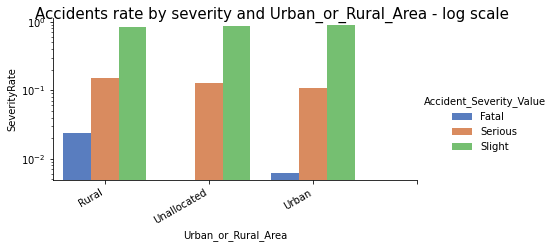

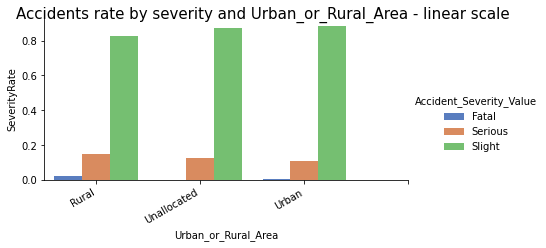

WARN: Driver_Home_Area_Type has 588603 NaN values. Percentage: 24.4


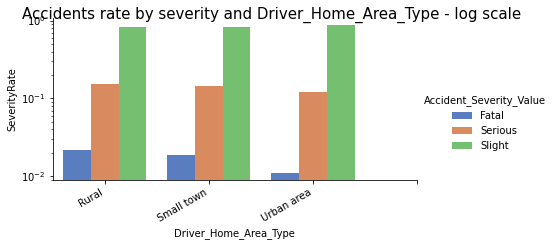

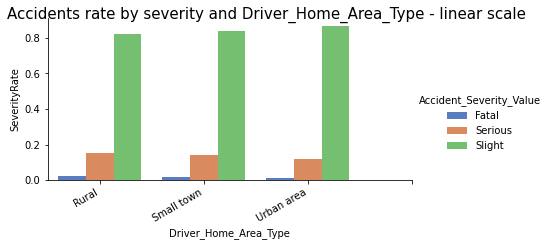

In [0]:
plotSeverityRateByIndependentVariable(data,'Urban_or_Rural_Area',yscale='log')
plotSeverityRateByIndependentVariable(data,'Driver_Home_Area_Type',yscale='log')

Features related to Road

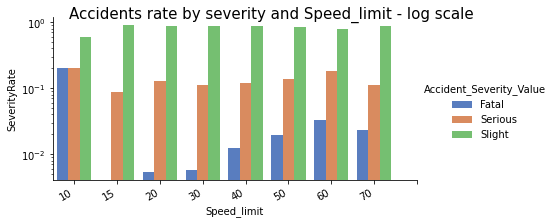

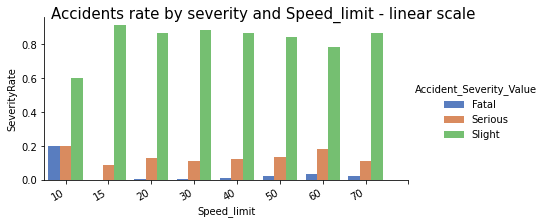

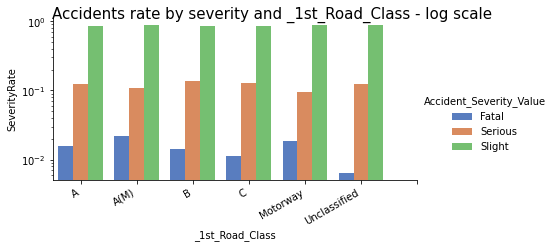

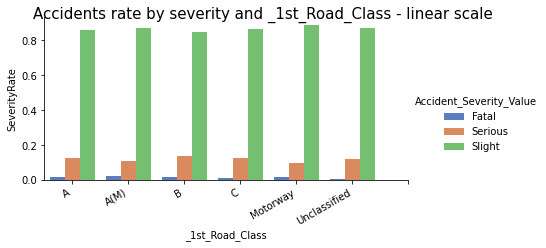

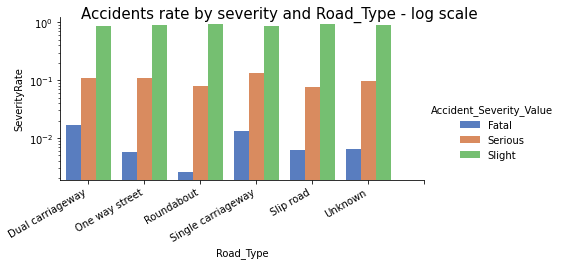

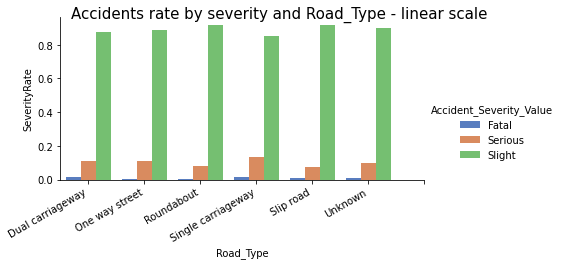

WARN: Junction_Detail has 33 NaN values. Percentage: 0.0


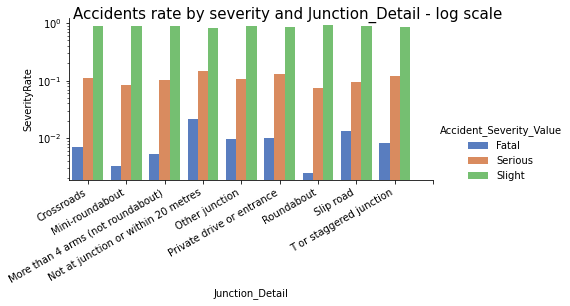

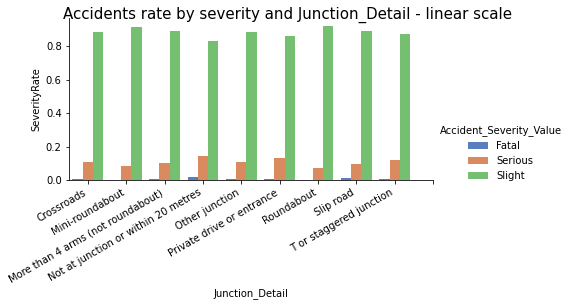

WARN: Junction_Control has 1027151 NaN values. Percentage: 51.9


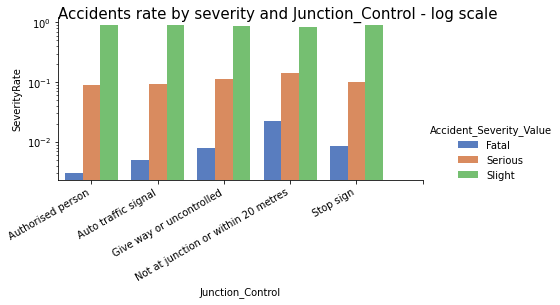

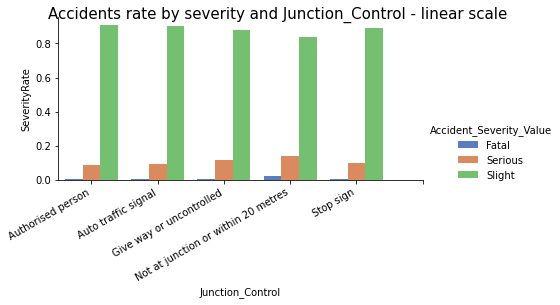

WARN: _2nd_Road_Class has 1194660 NaN values. Percentage: 66.0


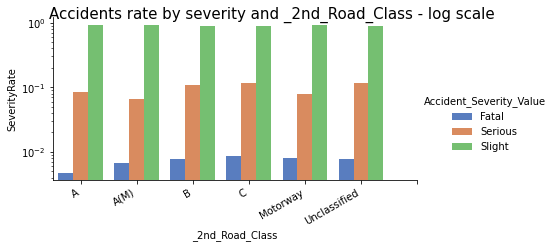

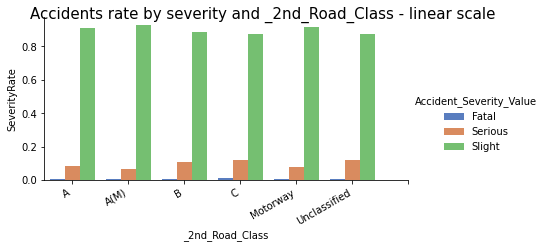

WARN: Pedestrian_Crossing_Human_Control has 37 NaN values. Percentage: 0.0


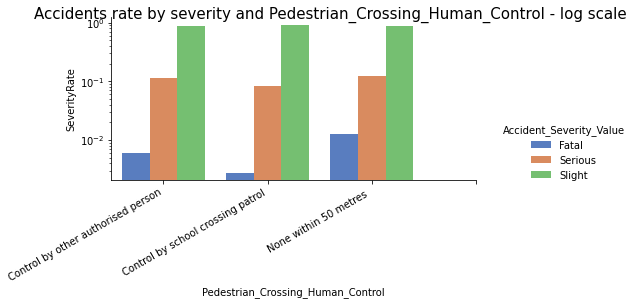

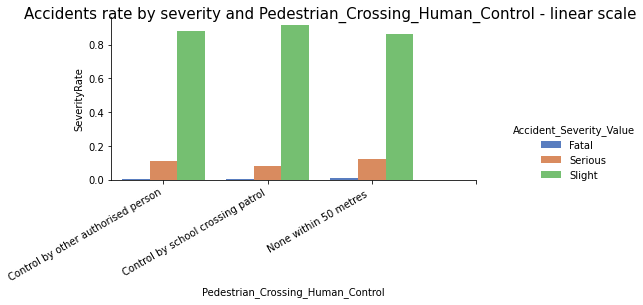

WARN: Pedestrian_Crossing_Physical_Facilities has 65 NaN values. Percentage: 0.0


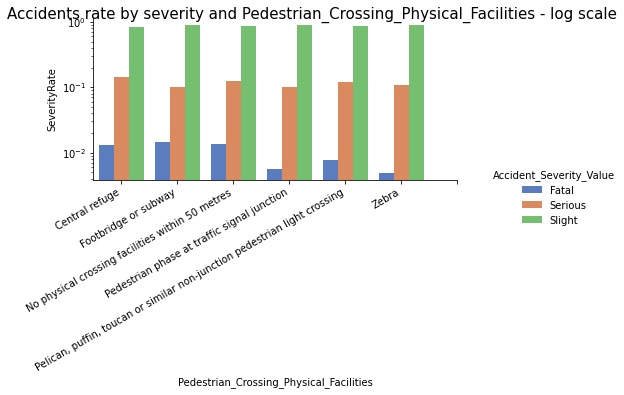

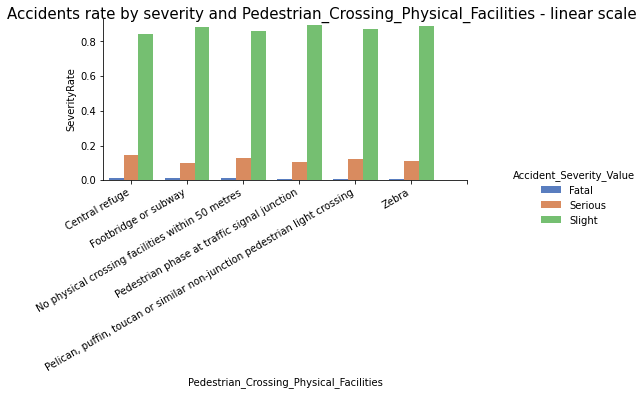

WARN: Road_Surface_Conditions has 3806 NaN values. Percentage: 0.1


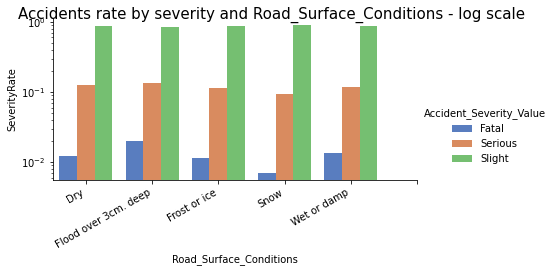

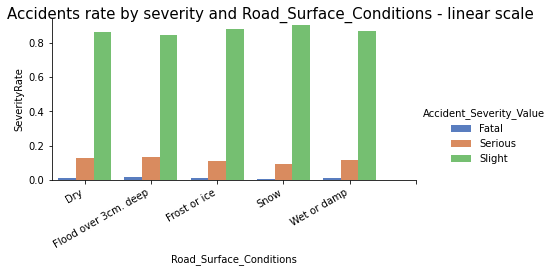

WARN: Carriageway_Hazards has 53 NaN values. Percentage: 0.0


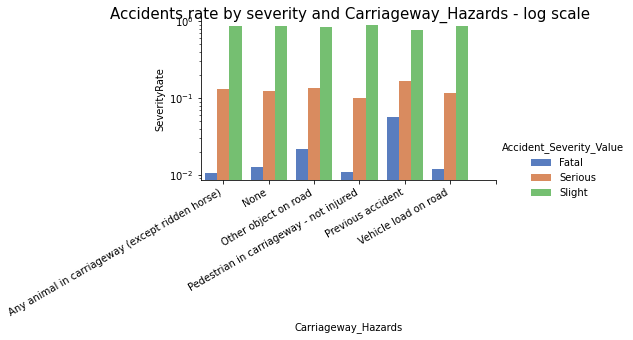

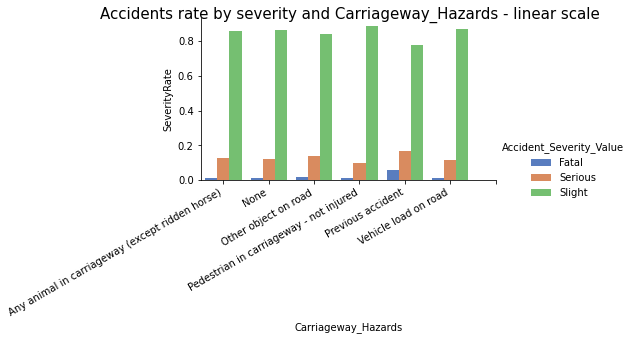

WARN: Special_Conditions_at_Site has 30 NaN values. Percentage: 0.0


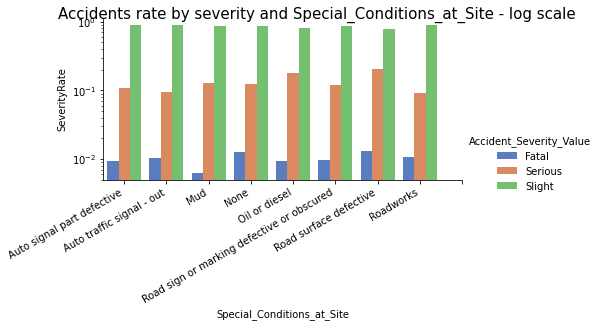

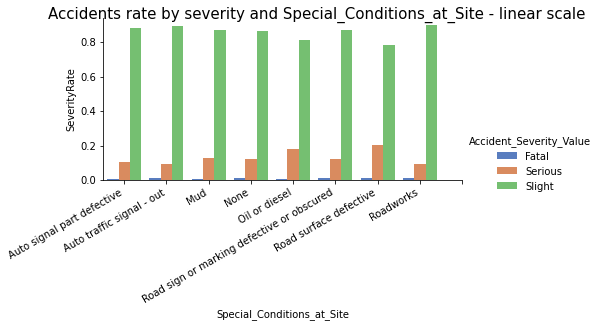

WARN: Junction_Location has 9876 NaN values. Percentage: 0.3


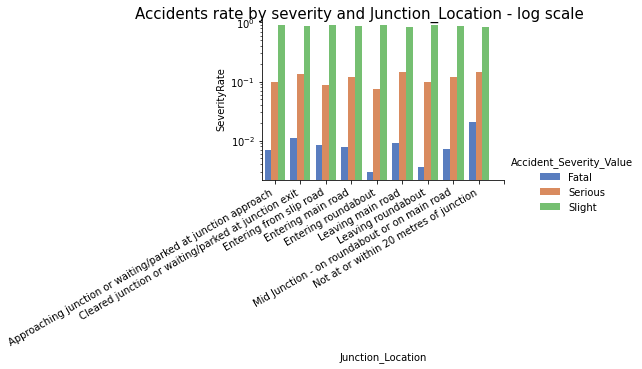

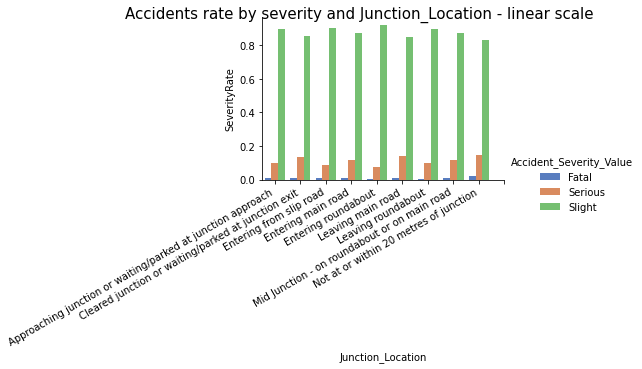

In [0]:
plotSeverityRateByIndependentVariable(data,'Speed_limit',yscale='log')
plotSeverityRateByIndependentVariable(data,'_1st_Road_Class',yscale='log')
plotSeverityRateByIndependentVariable(data,'Road_Type',yscale='log')
plotSeverityRateByIndependentVariable(data,'Junction_Detail',yscale='log')
plotSeverityRateByIndependentVariable(data,'Junction_Control',yscale='log')

plotSeverityRateByIndependentVariable(data,'_2nd_Road_Class',yscale='log')
plotSeverityRateByIndependentVariable(data,'Pedestrian_Crossing_Human_Control',yscale='log')
plotSeverityRateByIndependentVariable(data,'Pedestrian_Crossing_Physical_Facilities',yscale='log')
plotSeverityRateByIndependentVariable(data,'Road_Surface_Conditions',yscale='log')
plotSeverityRateByIndependentVariable(data,'Carriageway_Hazards',yscale='log')
plotSeverityRateByIndependentVariable(data,'Special_Conditions_at_Site',yscale='log')
plotSeverityRateByIndependentVariable(data,'Junction_Location',yscale='log')

Reatures related to vehicle

WARN: Towing_and_Articulation has 184 NaN values. Percentage: 0.0


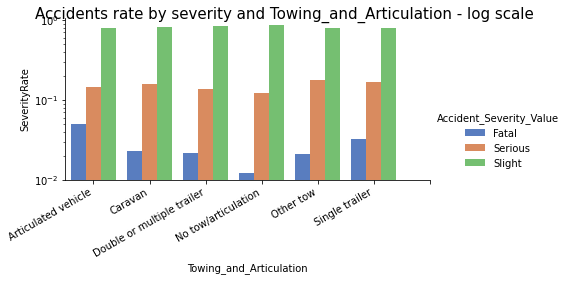

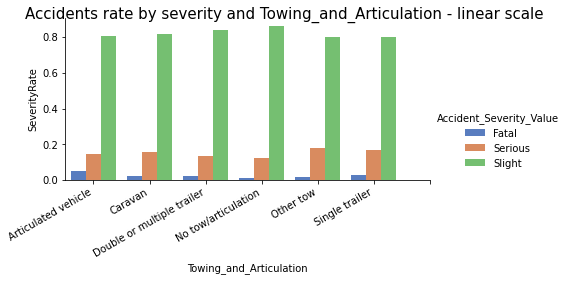

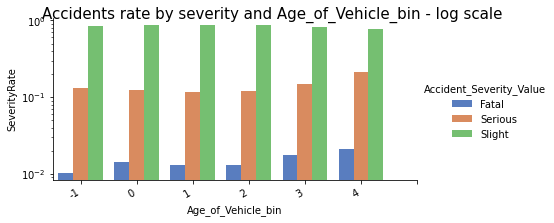

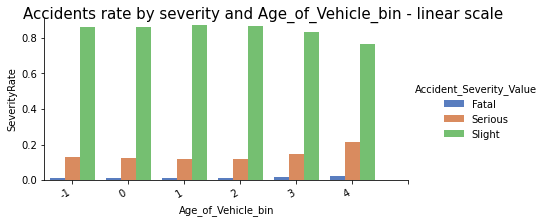

WARN: Vehicle_Type has 473 NaN values. Percentage: 0.0


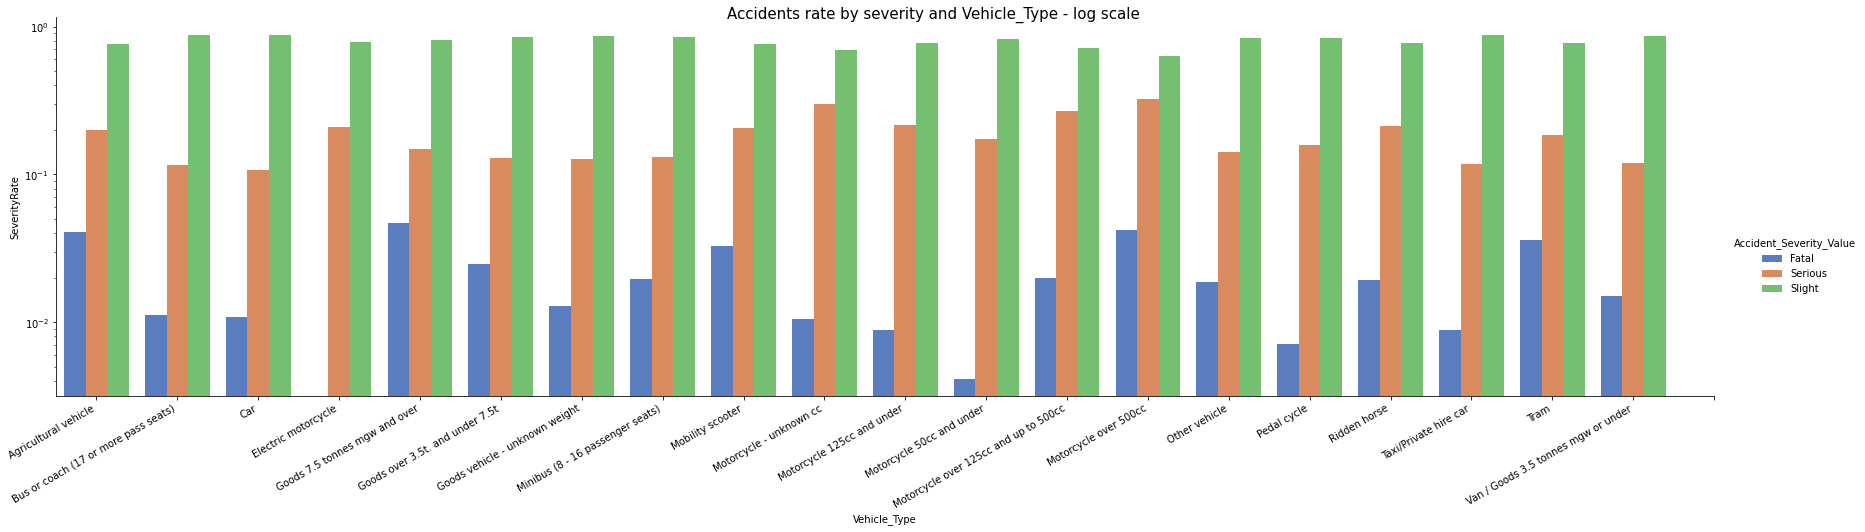

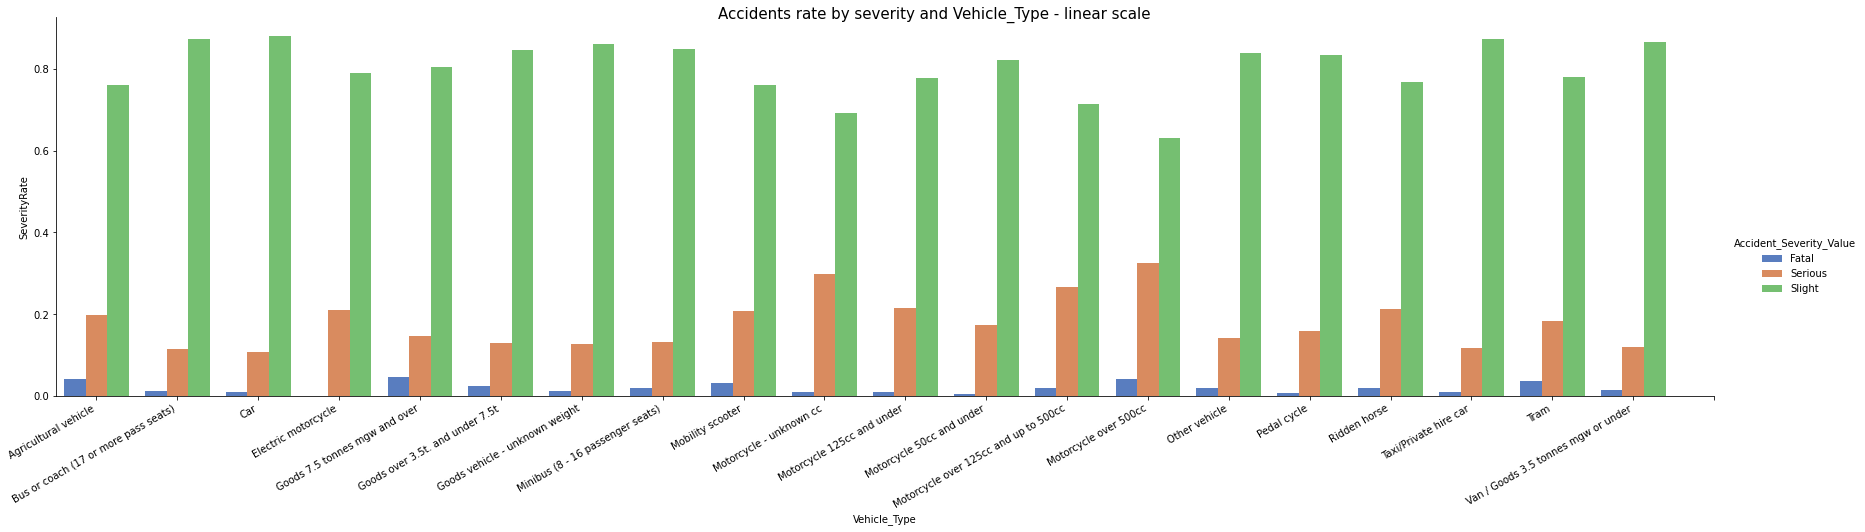

WARN: Propulsion_Code has 769993 NaN values. Percentage: 34.5


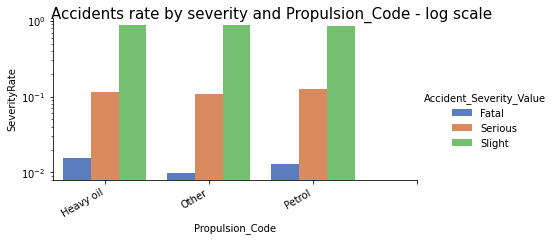

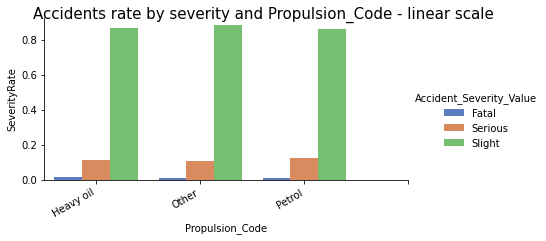

WARN: Was_Vehicle_Left_Hand_Drive has 23049 NaN values. Percentage: 0.8


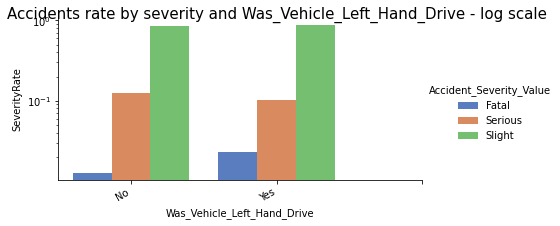

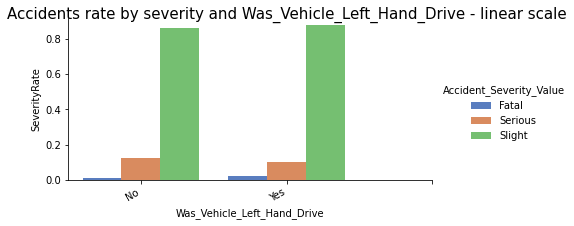

In [0]:
plotSeverityRateByIndependentVariable(data,'Towing_and_Articulation',yscale='log')
# plotSeverityRateByIndependentVariable(data,'Engine_Capacity_CC',yscale='log')
plotSeverityRateByIndependentVariable(data,'Age_of_Vehicle_bin',yscale='log')
plotSeverityRateByIndependentVariable(data,'Vehicle_Type',yscale='log',h=6,asp=4)
plotSeverityRateByIndependentVariable(data,'Propulsion_Code',yscale='log')
plotSeverityRateByIndependentVariable(data,'Was_Vehicle_Left_Hand_Drive',yscale='log')

Features related to Weather Conditions

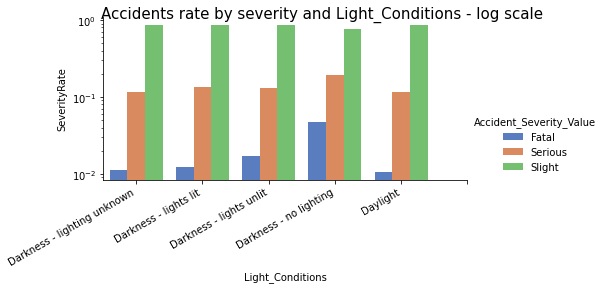

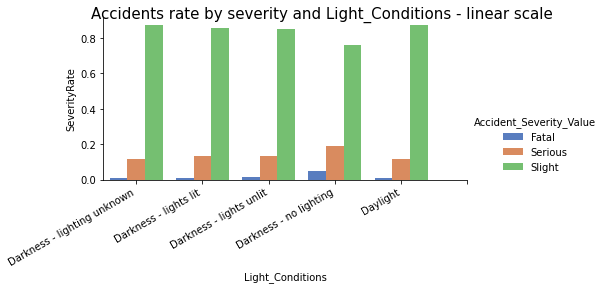

WARN: Weather_Conditions has 297 NaN values. Percentage: 0.0


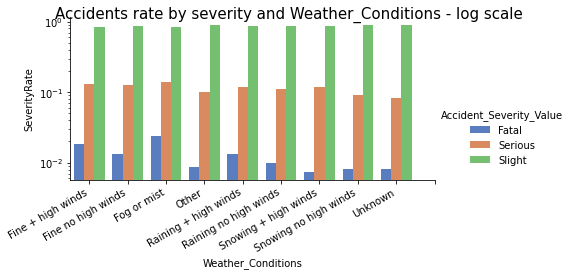

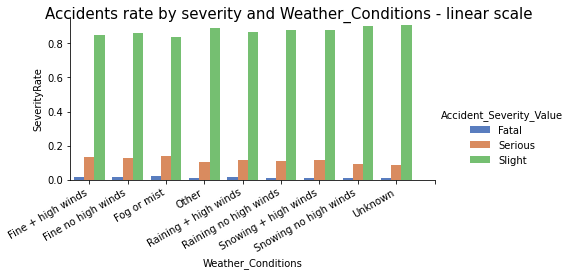

In [0]:
plotSeverityRateByIndependentVariable(data,'Light_Conditions',yscale='log')
plotSeverityRateByIndependentVariable(data,'Weather_Conditions',yscale='log')

Features related to the accident - Not used

In [0]:
# plotSeverityRateByIndependentVariable(data,'Number_of_Vehicles',yscale='log')
# plotSeverityRateByIndependentVariable(data,'Number_of_Casualties',yscale='log')
# plotSeverityRateByIndependentVariable(data,'Did_Police_Officer_Attend_Scene_of_Accident',yscale='log')
# plotSeverityRateByIndependentVariable(data,'Hit_Object_off_Carriageway',yscale='log')
# plotSeverityRateByIndependentVariable(data,'Hit_Object_in_Carriageway',yscale='log')
# plotSeverityRateByIndependentVariable(data,'1st_Point_of_Impact',yscale='log')
# plotSeverityRateByIndependentVariable(data,'Skidding_and_Overturning',yscale='log')

# Modelling

In [0]:
X = data.copy()

#drop variables not important
X = X.drop(['Accident_Index','Vehicle_Reference'],axis=1)
X = X.drop(['_1st_Road_Number','_2nd_Road_Number'],axis=1)

#geospatial features
X = X.drop(['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','LSOA_of_Accident_Location','Local_Authority_District','Police_Force','Local_Authority_Highway'],axis=1)

#drop variables that we can not infer and has a high number of NaNs
X = X.drop(['Driver_IMD_Decile','_2nd_Road_Class','Driver_Home_Area_Type','Junction_Control'],axis=1)

#drop redundant variables (day_of_week_number????)
X = X.drop(['date','time','datetime','day_of_week_number'],axis=1)

#drop values that we are using bins
X = X.drop(['Age_of_Vehicle','Age_of_Driver','Age_Band_of_Driver','Age_of_Driver_desc','Age_of_Vehicle_desc','day_of_week','hour','hour_bin_desc'],axis=1)

print(f'Shape before drops: {X.shape}')
#drop NaN from remaining columns
X = X.dropna()

#Drop values out of range, if any
X = X[(X['Age_of_Driver_bin'] >= 0) & (X['Age_of_Vehicle_bin'] >= 0)]

#get our target
y = X['Accident_Severity']

#drop our target
X = X.drop(['Accident_Severity','Accident_Severity_Value'],axis=1)
X = X.drop(['1st_Point_of_Impact','Did_Police_Officer_Attend_Scene_of_Accident','Hit_Object_in_Carriageway','Hit_Object_off_Carriageway','Number_of_Casualties','Number_of_Vehicles','Skidding_and_Overturning'],axis=1)

print(f'Shape after drops: {X.shape}')


X = pd.get_dummies(X) # Worst precision with drop_first=True
print(f'Shape after dummies: {X.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Shape before drops: (3004414, 38)
Shape after drops: (1952216, 29)
Shape after dummies: (1952216, 165)


In [0]:
X.columns

Index(['Speed_limit', 'Engine_Capacity_CC', 'Age_of_Driver_bin',
       'Age_of_Vehicle_bin', 'weekendNight', 'hour_bin', '_1st_Road_Class_A',
       '_1st_Road_Class_A(M)', '_1st_Road_Class_B', '_1st_Road_Class_C',
       ...
       'Junction_Location_Mid Junction - on roundabout or on main road',
       'Junction_Location_Not at or within 20 metres of junction',
       'Towing_and_Articulation_Articulated vehicle',
       'Towing_and_Articulation_Caravan',
       'Towing_and_Articulation_Double or multiple trailer',
       'Towing_and_Articulation_No tow/articulation',
       'Towing_and_Articulation_Other tow',
       'Towing_and_Articulation_Single trailer', 'weekends_Week',
       'weekends_Weekend'],
      dtype='object', length=165)

### Regression - SVC, SGD, KNN (works badly)

Need to set runFirstRefression = True to run.

In [0]:
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.preprocessing import *

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

if (runFirstRefression == True):
  classifiersNames = [
              'SVC',
              'SGD',
              'KNN'
          ]

  classifiers = [
          LinearSVC(class_weight='balanced', random_state = 0),
          SGDClassifier(),
          KNeighborsClassifier(n_neighbors = 5),
  ]

  logReg = zip(classifiersNames, classifiers)

  for nameClass, classifier in logReg:

      print(nameClass)
      classifier.fit(X_train, y_train)
      y_test_preds  = classifier.predict(X_test)

      featImportances = []
      if ('Tree' in nameClass or 'Forest' in nameClass):
          featImportances = pd.Series(classifier.feature_importances_, index=X_train.columns)

      regressionReports(y_test,y_test_preds,methodName=nameClass,featImportances = featImportances)


In [0]:
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.preprocessing import *

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

classifiersNames = [
            'SVC',
            'SGD',
            'KNN',

            'Random Forest: Gini',
            'Random Forest: Gini + Balanced',
 
            # 'Random Forest: Entropy',
            # 'Random Forest: Entropy + Balanced',
 
            'DecisionTreeClassifier: Gini',
            'DecisionTreeClassifier: Gini + Balanced'

            # 'DecisionTreeClassifier: Entropy',
            # 'DecisionTreeClassifier: Entropy + Balanced'
         ]

classifiers = [
        LinearSVC(class_weight='balanced', random_state = 0),
        SGDClassifier(),
        KNeighborsClassifier(n_neighbors = 5),

        RandomForestClassifier(random_state=0, criterion='gini',n_jobs=-1,bootstrap=False,n_estimators=100),
        RandomForestClassifier(random_state=0, criterion='gini',class_weight='balanced',n_jobs=-1,bootstrap=False,n_estimators=100),

        # RandomForestClassifier(random_state=0, criterion='entropy',n_jobs=-1,bootstrap=False,n_estimators=100),
        # RandomForestClassifier(random_state=0, criterion='entropy',class_weight='balanced',n_jobs=-1,bootstrap=False,n_estimators=100),

        DecisionTreeClassifier(criterion='gini'),
        DecisionTreeClassifier(criterion='gini',class_weight='balanced')

        # DecisionTreeClassifier(criterion='entropy'),
        # DecisionTreeClassifier(criterion='entropy',class_weight='balanced'),
]

logReg = zip(classifiersNames, classifiers)

### Regression: Decision Trees and Random Forests (still badly)


 Random Forests Report: 
               precision    recall  f1-score   support

       Fatal       0.16      0.03      0.05      5423
     Serious       0.30      0.07      0.11     48943
      Slight       0.87      0.98      0.92    336078

    accuracy                           0.85    390444
   macro avg       0.44      0.36      0.36    390444
weighted avg       0.79      0.85      0.81    390444



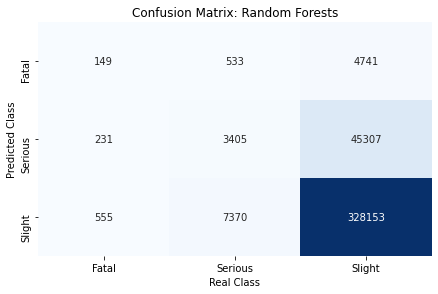

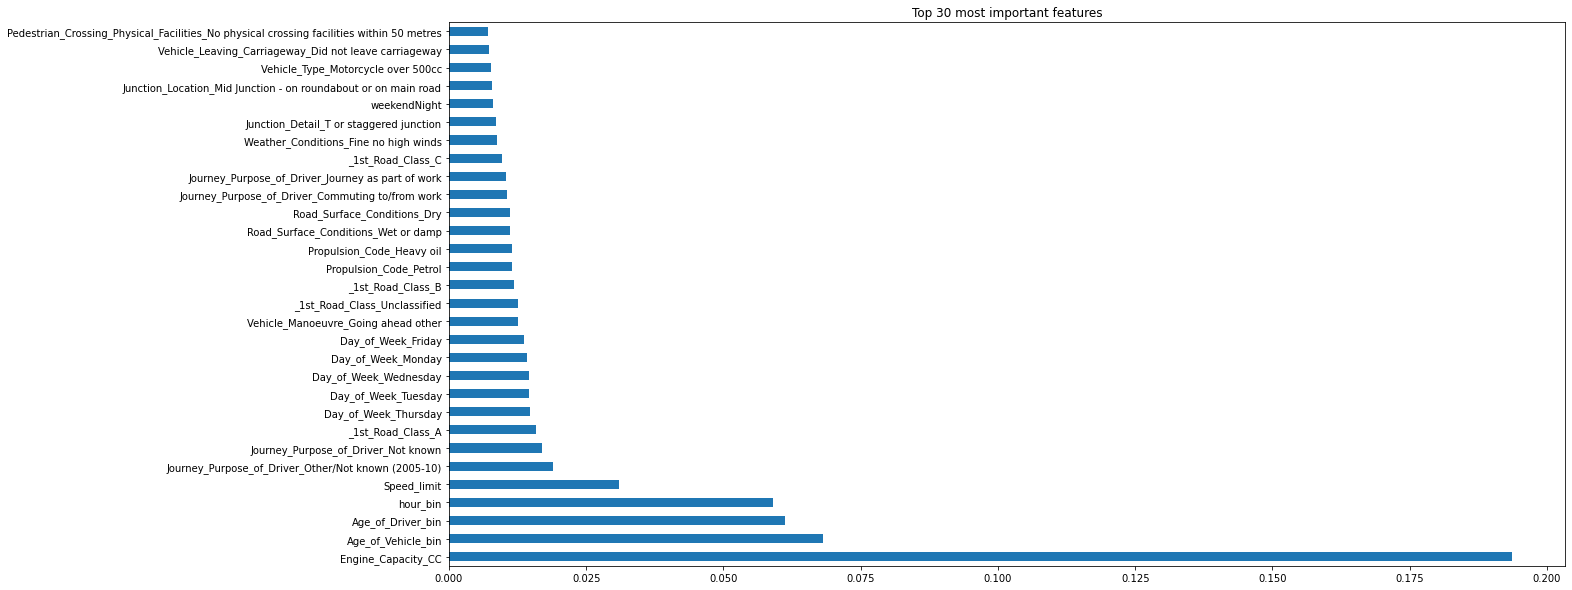

In [0]:
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.preprocessing import *

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

nameClass = 'Random Forests'
classifier = RandomForestClassifier(random_state=0, criterion='gini',n_jobs=-1,bootstrap=False,n_estimators=100)
classifier.fit(X_train, y_train)
y_test_preds  = classifier.predict(X_test)
featImportances = pd.Series(classifier.feature_importances_, index=X_train.columns)
regressionReports(y_test,y_test_preds,methodName=nameClass,featImportances = featImportances)



 Random Forests + Balanced Report: 
               precision    recall  f1-score   support

       Fatal       0.17      0.03      0.05      5423
     Serious       0.29      0.06      0.10     48943
      Slight       0.87      0.98      0.92    336078

    accuracy                           0.85    390444
   macro avg       0.44      0.36      0.36    390444
weighted avg       0.79      0.85      0.80    390444



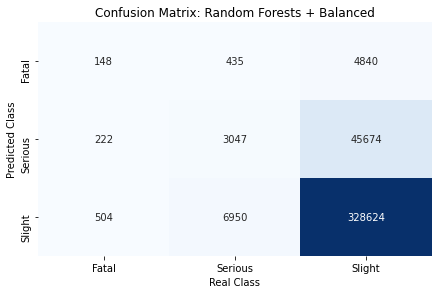

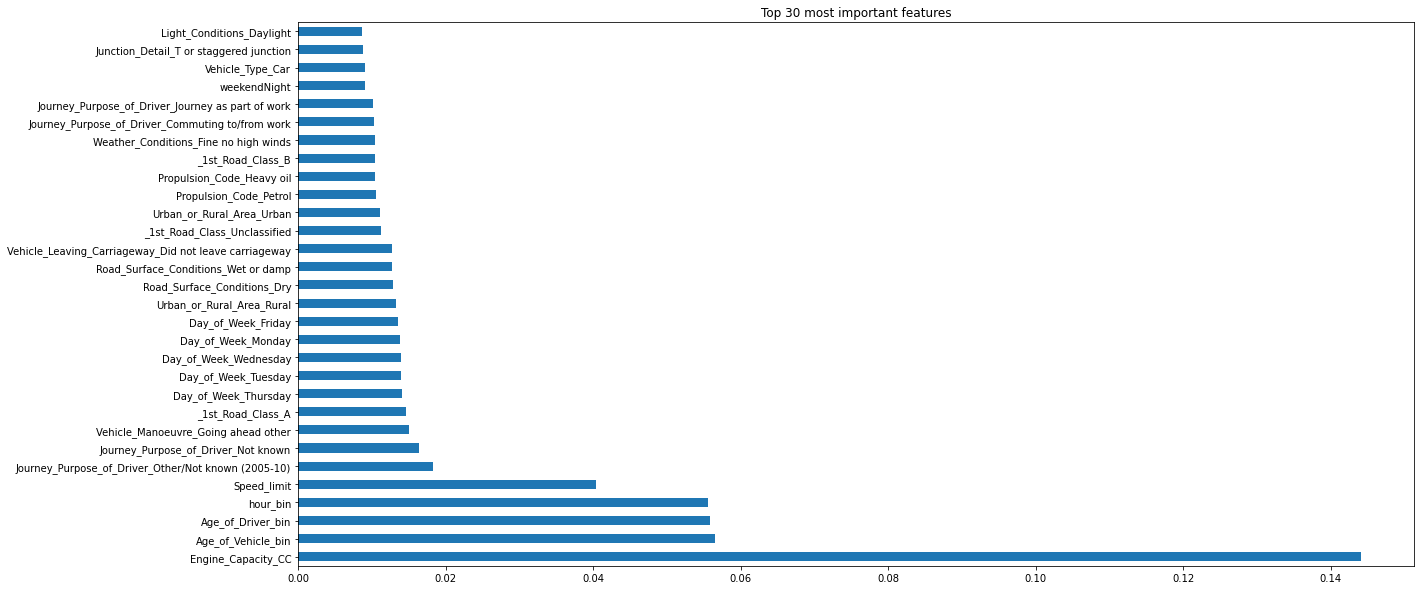

In [0]:
nameClass = 'Random Forests + Balanced'
classifier = RandomForestClassifier(random_state=0, criterion='gini',class_weight='balanced',n_jobs=-1,bootstrap=False,n_estimators=100)
classifier.fit(X_train, y_train)
y_test_preds  = classifier.predict(X_test)
featImportances = pd.Series(classifier.feature_importances_, index=X_train.columns)
regressionReports(y_test,y_test_preds,methodName=nameClass,featImportances = featImportances)



 DecisionTreeClassifier Report: 
               precision    recall  f1-score   support

       Fatal       0.06      0.07      0.07      5423
     Serious       0.18      0.21      0.19     48943
      Slight       0.87      0.85      0.86    336078

    accuracy                           0.76    390444
   macro avg       0.37      0.38      0.37    390444
weighted avg       0.78      0.76      0.77    390444



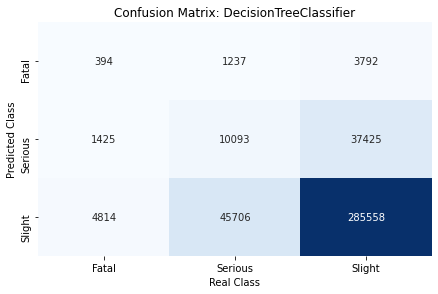

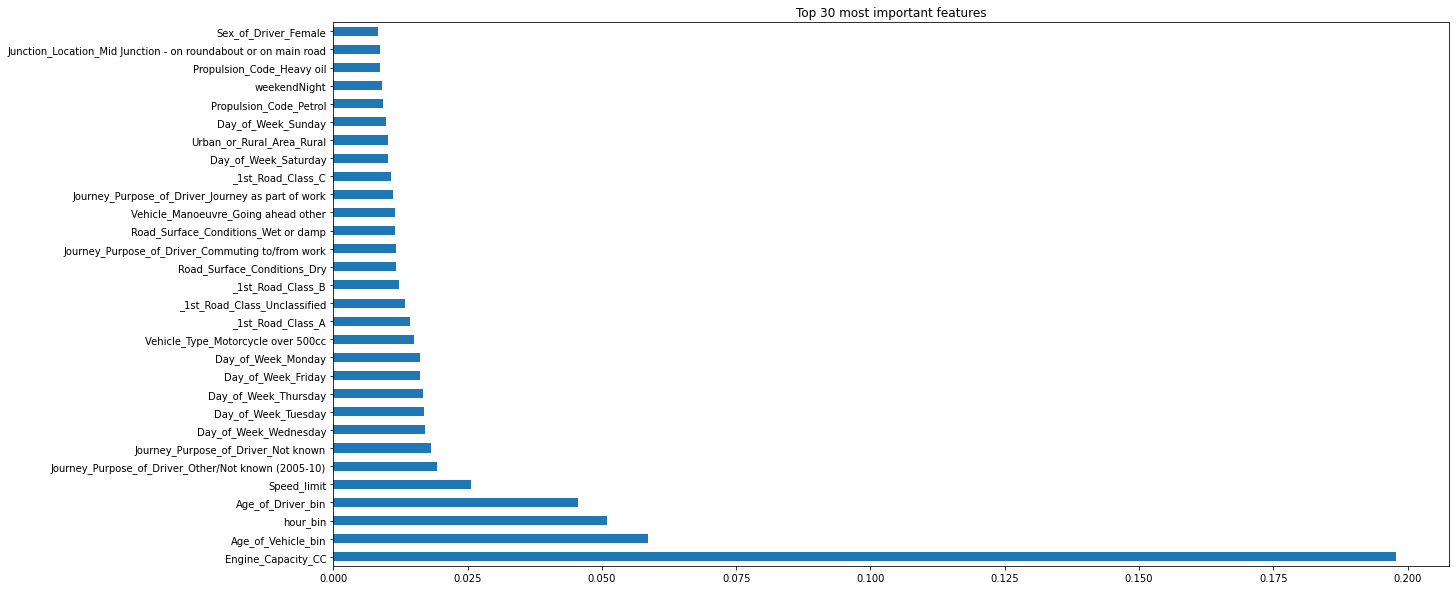

In [0]:
nameClass = 'DecisionTreeClassifier'
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)
y_test_preds  = classifier.predict(X_test)
featImportances = pd.Series(classifier.feature_importances_, index=X_train.columns)
regressionReports(y_test,y_test_preds,methodName=nameClass,featImportances = featImportances)



 DecisionTreeClassifier + Balanced Report: 
               precision    recall  f1-score   support

       Fatal       0.06      0.08      0.07      5423
     Serious       0.17      0.20      0.18     48943
      Slight       0.87      0.86      0.86    336078

    accuracy                           0.76    390444
   macro avg       0.37      0.38      0.37    390444
weighted avg       0.77      0.76      0.77    390444



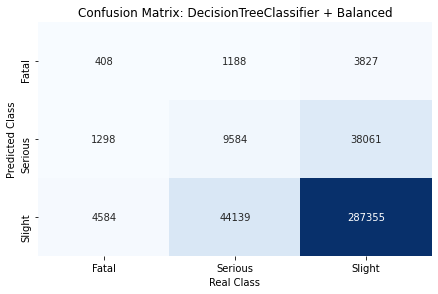

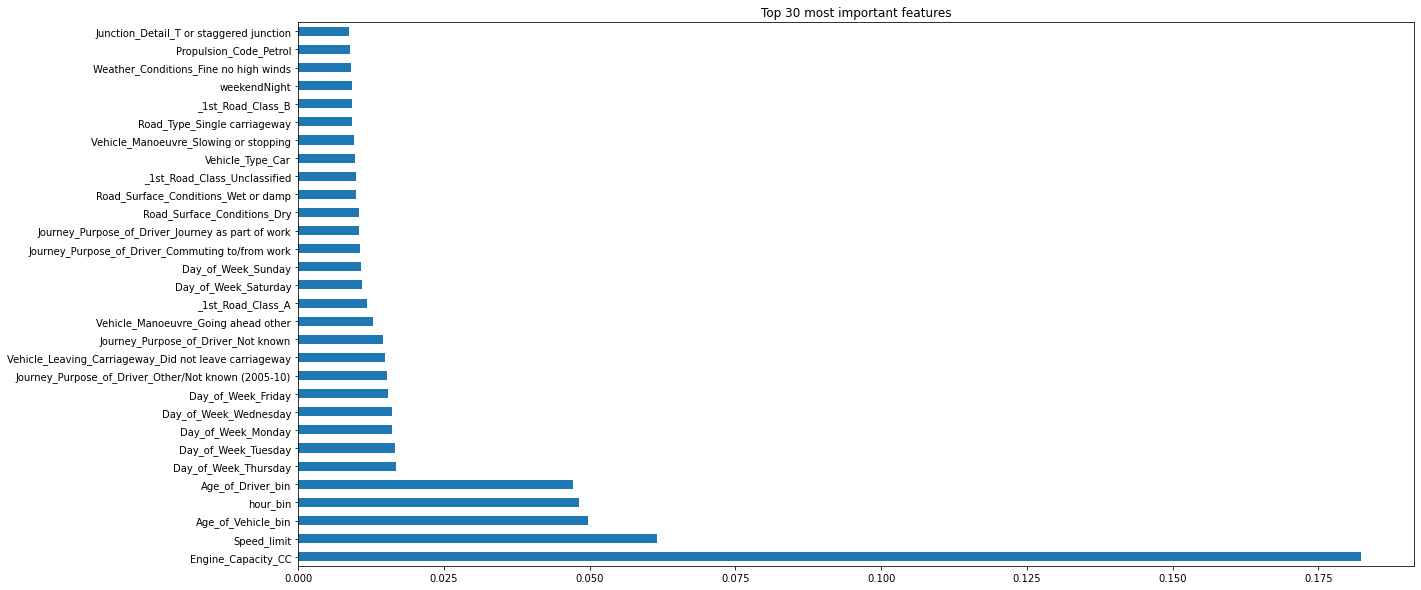

In [0]:
nameClass = 'DecisionTreeClassifier + Balanced'
classifier = DecisionTreeClassifier(criterion='gini',class_weight='balanced')
classifier.fit(X_train, y_train)
y_test_preds  = classifier.predict(X_test)
featImportances = pd.Series(classifier.feature_importances_, index=X_train.columns)
regressionReports(y_test,y_test_preds,methodName=nameClass,featImportances = featImportances)


### Over-sampling using SMOTE - Extend features

In [0]:
from imblearn.over_sampling import SMOTE
print(f'Shape before Over-Sampling: {X_train.shape} - {y_train.shape}')
division = y_train.reset_index().groupby('Accident_Severity').size()
print(f'Number of classes before Over-Sampling: {division}')
# resample data ONLY using training data
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train) 

# view synthetic sample class distribution
print(f'Shape after Over-Sampling: {X_resampled.shape} - {y_resampled.shape}')
division = y_resampled.reset_index().groupby('Accident_Severity').size()
print(f'Number of classes after Over-Sampling {division}')
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)


Using TensorFlow backend.


Shape before Over-Sampling: (1561772, 165) - (1561772,)
Number of classes before Over-Sampling: Accident_Severity
Fatal        22144
Serious     195208
Slight     1344420
dtype: int64
Shape after Over-Sampling: (4033260, 165) - (4033260,)
Number of classes after Over-Sampling Accident_Severity
Fatal      1344420
Serious    1344420
Slight     1344420
dtype: int64


### Regression: Decision Trees and Random Forests After SMOTE - Extended features


 Random Forests Report: 
               precision    recall  f1-score   support

       Fatal       0.99      0.98      0.99    269092
     Serious       0.96      0.87      0.91    268857
      Slight       0.88      0.96      0.92    268703

    accuracy                           0.94    806652
   macro avg       0.94      0.94      0.94    806652
weighted avg       0.94      0.94      0.94    806652



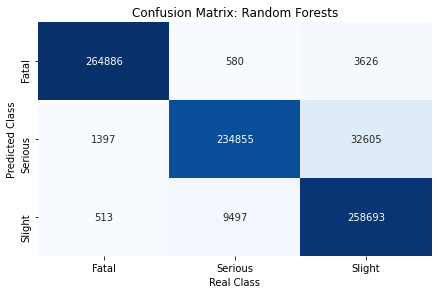

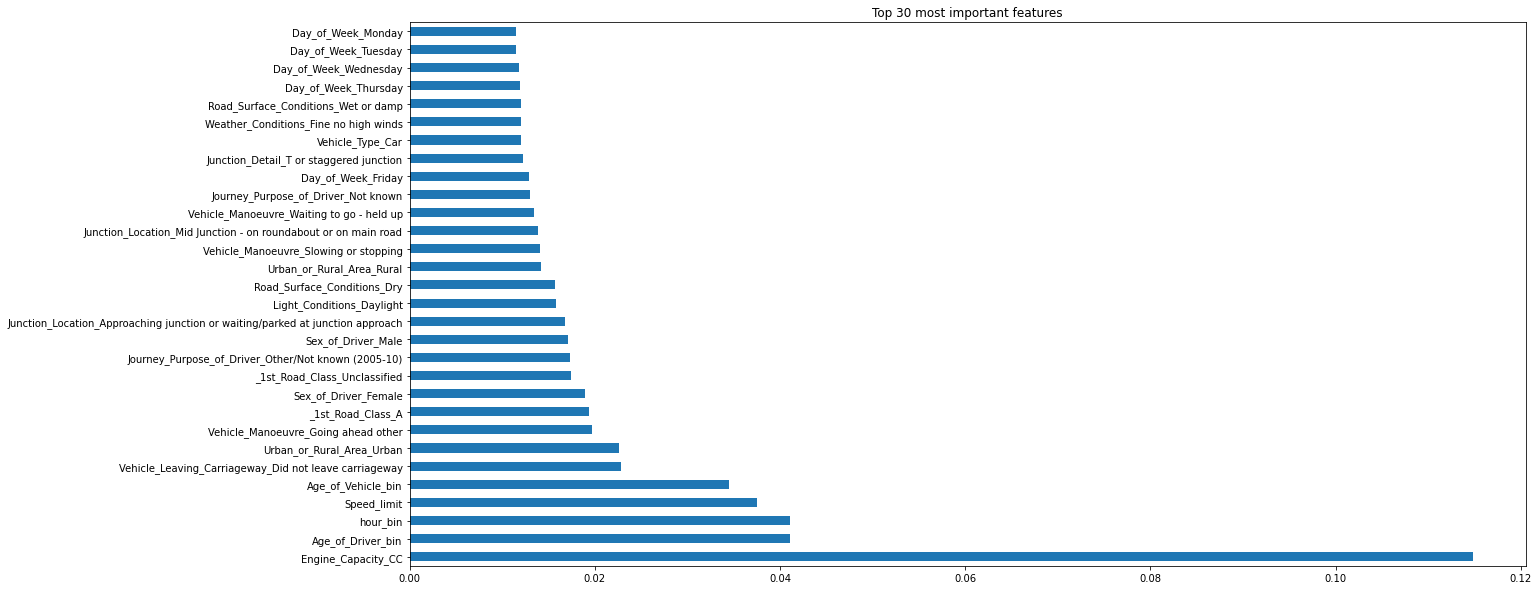

In [0]:
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.preprocessing import *


nameClass = 'Random Forests'
classifier = RandomForestClassifier(random_state=0, criterion='gini',n_jobs=-1,bootstrap=False,n_estimators=100)
classifier.fit(X_train, y_train)
y_test_preds  = classifier.predict(X_test)
featImportances = pd.Series(classifier.feature_importances_, index=X_train.columns)
regressionReports(y_test,y_test_preds,methodName=nameClass,featImportances = featImportances)



 DecisionTreeClassifier Report: 
               precision    recall  f1-score   support

       Fatal       0.96      0.98      0.97    269092
     Serious       0.85      0.86      0.86    268857
      Slight       0.87      0.84      0.86    268703

    accuracy                           0.89    806652
   macro avg       0.89      0.89      0.89    806652
weighted avg       0.89      0.89      0.89    806652



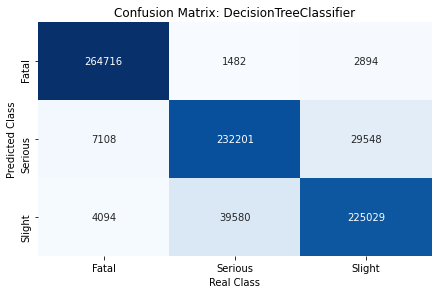

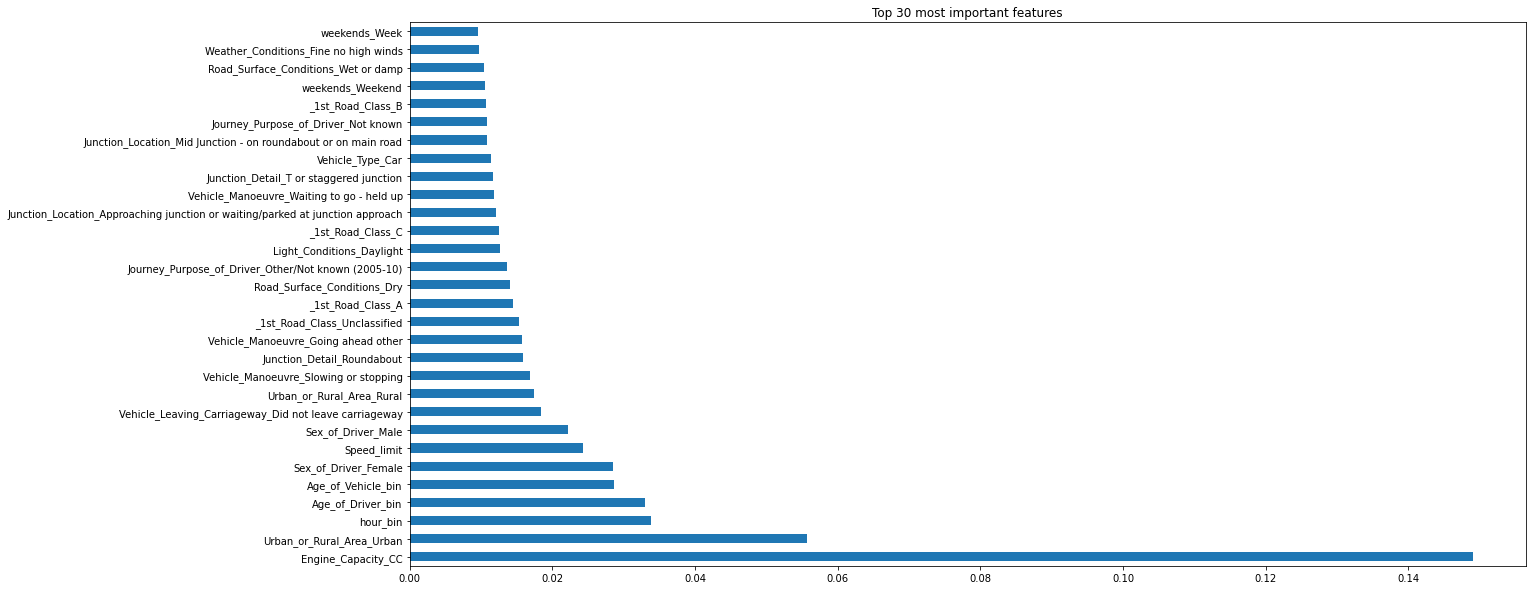

In [0]:
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.preprocessing import *



nameClass = 'DecisionTreeClassifier'
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)
y_test_preds  = classifier.predict(X_test)
featImportances = pd.Series(classifier.feature_importances_, index=X_train.columns)
regressionReports(y_test,y_test_preds,methodName=nameClass,featImportances = featImportances)

# Final model - With minimun variables

Shape before drops: (3004414, 66)
Shape after drops: (949196, 14)
Shape after dummies: (949196, 58)
Shape before Over-Sampling: (759356, 58) - (759356,)
Number of classes before Over-Sampling: Accident_Severity
Fatal        5813
Serious     83772
Slight     669771
dtype: int64
Shape after Over-Sampling: (2009313, 58) - (2009313,)
Number of classes after Over-Sampling Accident_Severity
Fatal      669771
Serious    669771
Slight     669771
dtype: int64

 Random Forests Report: 
               precision    recall  f1-score   support

       Fatal       0.97      0.99      0.98    134049
     Serious       0.81      0.84      0.82    133974
      Slight       0.85      0.79      0.82    133840

    accuracy                           0.87    401863
   macro avg       0.87      0.87      0.87    401863
weighted avg       0.87      0.87      0.87    401863



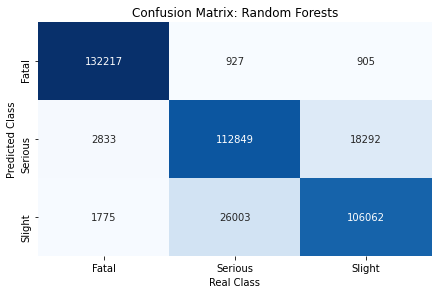

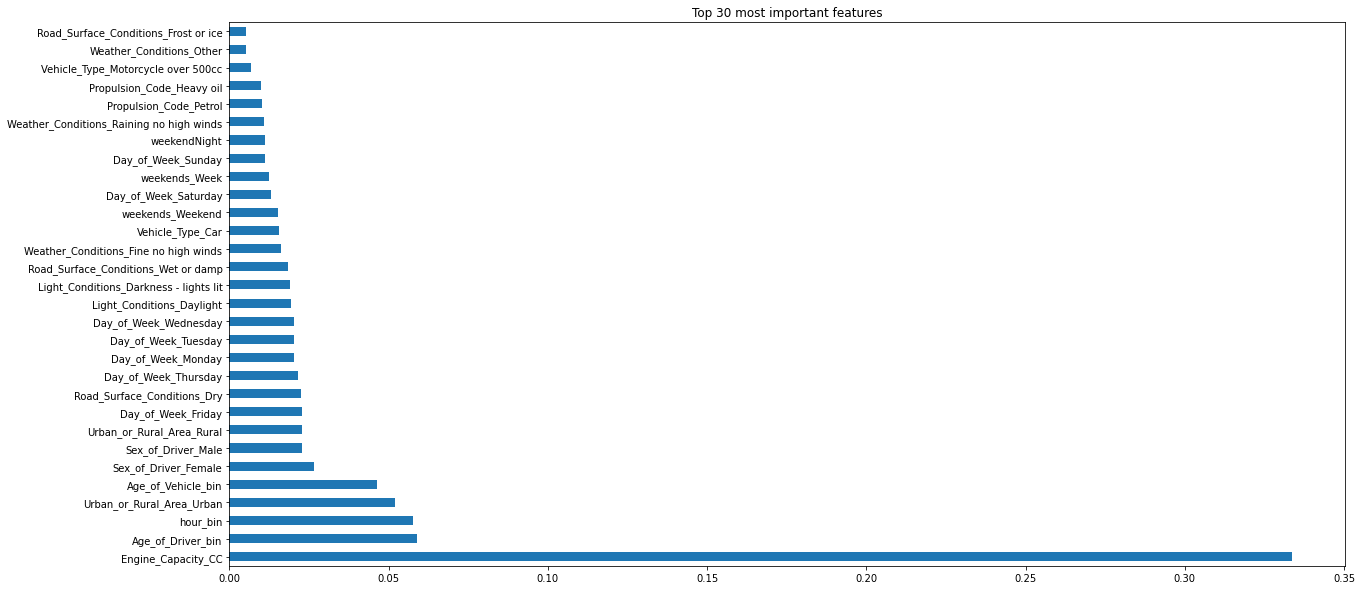

In [0]:
X = data.copy()

print(f'Shape before drops: {X.shape}')
#drop NaN from remaining columns
X = X.dropna()
#get our target
y = X['Accident_Severity']

X = X[['Light_Conditions','Urban_or_Rural_Area','Day_of_Week','Weather_Conditions','Road_Surface_Conditions','Engine_Capacity_CC','Vehicle_Type','Sex_of_Driver','Propulsion_Code','Age_of_Driver_bin','Age_of_Vehicle_bin','weekends','weekendNight','hour_bin']]

print(f'Shape after drops: {X.shape}')

X = pd.get_dummies(X,drop_first=False) # Worst precision with 
print(f'Shape after dummies: {X.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



from imblearn.over_sampling import SMOTE
print(f'Shape before Over-Sampling: {X_train.shape} - {y_train.shape}')
division = y_train.reset_index().groupby('Accident_Severity').size()
print(f'Number of classes before Over-Sampling: {division}')
# resample data ONLY using training data
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train) 

# view synthetic sample class distribution
print(f'Shape after Over-Sampling: {X_resampled.shape} - {y_resampled.shape}')
division = y_resampled.reset_index().groupby('Accident_Severity').size()
print(f'Number of classes after Over-Sampling {division}')
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)


nameClass = 'Random Forests'
classifier = RandomForestClassifier(random_state=0, criterion='gini',n_jobs=-1,bootstrap=False,n_estimators=100)
classifier.fit(X_train, y_train)
y_test_preds  = classifier.predict(X_test)
featImportances = pd.Series(classifier.feature_importances_, index=X_train.columns)
regressionReports(y_test,y_test_preds,methodName=nameClass,featImportances = featImportances)



In [0]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 3787.63910984993 seconds ---


# Minimum variables improved


In [0]:
nameClass = 'Random Forests'
classifier = RandomForestClassifier(random_state=0, criterion='gini',n_jobs=-1,bootstrap=False,n_estimators=100)
classifier.fit(X_train, y_train)
y_test_preds  = classifier.predict(X_test)
featImportances = pd.Series(classifier.feature_importances_, index=X_train.columns)
regressionReports(y_test,y_test_preds,methodName=nameClass,featImportances = featImportances)


### Regression after PCA (Works badly)

In [0]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=32)
# X_pca = pca.fit_transform(X_resampled)
# y = y_resampled

# print("Variance Ratio Explained by PCA: " ,pca.explained_variance_ratio_.sum())

# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

# logReg = zip(classifiersNames, classifiers)

# for nameClass, classifier in logReg:

#     print(nameClass)
#     classifier.fit(X_train, y_train)
#     y_test_preds  = classifier.predict(X_test)

#     featImportances = []
#     # if ('Tree' in nameClass or 'Forest' in nameClass):
#     #     featImportances = pd.Series(classifier.feature_importances_, index=X_train.columns)

#     regressionReports(y_test,y_test_preds,methodName=nameClass,featImportances = featImportances)

